<a href="https://colab.research.google.com/github/vbaezfortunato/Statistical-Learning-I-Seccion-V/blob/master/Backfoward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
features = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

In [21]:
label = np.array([[0],
                      [1],
                      [1],
                      [0]])

In [22]:
u_1 = np.ones((4,1))
u_1

array([[1.],
       [1.],
       [1.],
       [1.]])

In [23]:
u_2 = np.ones((4,1))
u_2

array([[1.],
       [1.],
       [1.],
       [1.]])

In [24]:
u_end = np.ones((4,1))
u_end

array([[1.],
       [1.],
       [1.],
       [1.]])

In [25]:
mu,sigma = 0.1, 0.5 

In [26]:
w_1 = np.random.normal(mu, sigma,(2,2))
w_1

array([[-0.25616372,  0.13680058],
       [-0.58088197,  0.07644586]])

In [27]:
w_2 = np.random.normal(mu, sigma,(2,2))
w_2

array([[ 0.0312428 , -0.13077284],
       [ 0.4827419 , -0.31200913]])

In [28]:
w_end = np.random.normal(mu, sigma,(2,1))
w_end

array([[-0.53638072],
       [ 0.78837378]])

In [29]:

b_1 = np.random.normal(mu, sigma,(1,2))
b_1

array([[0.55236956, 0.41169182]])

In [30]:
b_2 = np.random.normal(mu, sigma,(1,2))
b_2

array([[-0.24090124,  1.02529094]])

In [31]:
b_end = np.random.normal(mu, sigma,(1,1))
b_end

array([[-0.11380992]])

# **Activation:**

In [32]:
def relu(X):
   return np.maximum(0,X)
  

In [33]:
def heaviside (x):
    derivada = (x >=0).astype(float)
    return derivada

In [34]:
def backfoward(x,y,p_1,p_2,p_f,ba_1,ba_2,ba_end,u1,u2,u_end,lr=0.1,epochs=10,imprimir=2):
    
    for i in range(epochs):
        ## forward propagation
        ## capa intermedia_1
        kpa_inter_1 = np.matmul(x,p_1) + ba_1
        kpa_inter_1_act = relu(kpa_inter_1)
    
        ## capa intermedia_2
        kpa_inter_2 = np.matmul(kpa_inter_1_act,p_2) + ba_2
        kpa_inter_2_act = relu(kpa_inter_2)
    
        ## capa final sin activacion
        kpa_final = np.matmul(kpa_inter_2_act,p_f) + ba_end
    
        ## backward propagation
        
        delta_f = y - kpa_final 
    
        ## error en la capa intermedia 2
        delta_kpa_inter_2 = np.matmul(p_f,delta_f.T).T * heaviside(kpa_inter_2)
     
        ## error en la capa inter 1
        delta_kpa_inter_1 = np.matmul(p_2,delta_kpa_inter_2.T).T * heaviside(kpa_inter_1)
    
        ## Gradientes
        
        ## gradiente capa intermedia 1
        G_kpa_inter_1 = np.mean(np.matmul(x,delta_kpa_inter_1.T), axis = 0).reshape(2,2)
        
        ## gradiente capa intermedia 2
        G_kpa_inter_2 = np.mean(np.matmul(kpa_inter_1_act,delta_kpa_inter_2.T), axis = 0).reshape(2,2)
        
        ## gradiente capa final
        G_kpa_f = np.matmul(kpa_inter_2_act.T,delta_f)
        
        ## bias
      
        b_kpa_inter_1 = np.matmul(u1.T,delta_kpa_inter_1)
        
        ## bias capa intermida 1
        b_kpa_inter_2 = np.matmul(u2.T,delta_kpa_inter_2)
        
        ## bias capa final
        b_kpa_f = np.matmul(u_end.T,delta_f)       
          
        ## weight updated
        p_f = p_f - (lr * G_kpa_f)
        p_2 = p_2 - (lr * G_kpa_inter_2)
        p_1 = p_1 - (lr * G_kpa_inter_1)
        
        ## bias 
        ba_end = ba_end - (lr * b_kpa_f)
        ba_2 = ba_2 - (lr * b_kpa_inter_2)
        ba_1 = ba_1 - (lr * b_kpa_inter_1)
        
        ##  MSE
        error = (np.mean(np.power(y-kpa_final,2)))*0.5
        
        if i % imprimir == 0: 
            print("Error", i, error)
       
    
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(kpa_inter_2_act[:,0],kpa_inter_2_act[:,1])
    plt.show()
    
    return kpa_inter_2_act


Error 0 0.19356708439385228
Error 1 0.1935681041105472
Error 2 0.19356912384261582
Error 3 0.19357014359005836
Error 4 0.19357116335287522
Error 5 0.19357218313106647
Error 6 0.19357320292463243
Error 7 0.1935742227335733
Error 8 0.1935752425578894
Error 9 0.19357626239758086
Error 10 0.19357728225264803
Error 11 0.19357830212309113
Error 12 0.19357932200891034
Error 13 0.19358034191010604
Error 14 0.19358136182667834
Error 15 0.19358238175862752
Error 16 0.19358340170595384
Error 17 0.19358442166865752
Error 18 0.19358544164673883
Error 19 0.19358646164019805


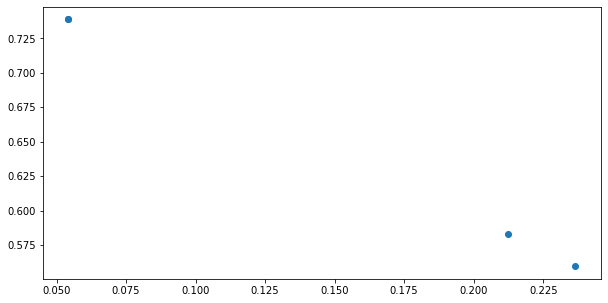

array([[0.05417295, 0.73874467],
       [0.05417295, 0.73874467],
       [0.236592  , 0.55960739],
       [0.21238364, 0.58338023]])

In [36]:
backfoward(features,label,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_end,0.000001,20,1)

Error 0 0.7626882826889776
Error 100 0.7637751862627533
Error 200 0.7648641106726697
Error 300 0.7659550609080182
Error 400 0.7670480419757268
Error 500 0.7681430589004359
Error 600 0.7692401167245808
Error 700 0.7703392205084678
Error 800 0.7714403753303621
Error 900 0.7725435862865597


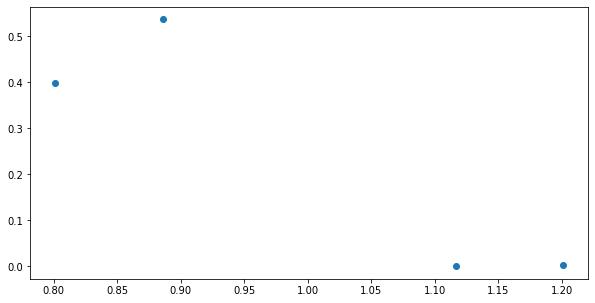

array([[1.20085373, 0.00285436],
       [1.11652928, 0.        ],
       [0.88568388, 0.53684374],
       [0.80135943, 0.39841814]])

In [47]:
backfoward(features,label,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_end,0.000001,1000,100)

**Conclusion:**

*  Por lo que se puedo ver en backforward propagation mientras mejor se definar los parametros al inicio mas facil el proceso puede converger.

*  En las Capas intermedias se nota que los valores de x se centra esto es debido a la utilizacion de relu como activacion.
